<div class="frontmatter text-center">
<h1> Introduction to Data Science and Programming</h1>
<h2>Lecture 20: Skewed data</h2>
<h3>IT University of Copenhagen, Fall 2022</h3>
<h3>Instructor: Michael Szell</h3>
</div>

# Source
This notebook was adapted from:
* James Bagrow: http://bagrow.com/dsv/

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
from random import *
np.random.seed(seed=10)

# From narrow to broad data

### Narrow data

In many physical systems a quantity is distributed following a normal distribution tightly around some central value. For example, the heights of humans.

You can see this distribution with a histogram:

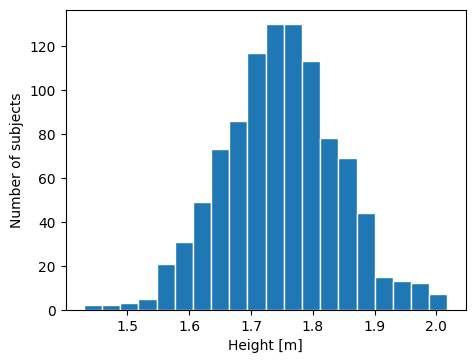

In [7]:
heights = 1.75 + np.random.randn(1000,1)*0.1    

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(heights, 20, edgecolor="w")
axes.set_xlabel("Height [m]")
axes.set_ylabel("Number of subjects");

It's called the "normal distribution" because it's so common.

You don't see humans that are 20 meters tall, or 20 kilometers.

### Broad data

But many systems, like social systems, do not exhibit such a narrow spread of values!

USA income distribution:

<img src="files/us-income-distribution.gif" width=800>

If we compute a histogram going from 5k/year of income to 500M/year, we're going to need a huge number of bins to cover that range, and almost all of the data is going to be crammed into the first few bins (covering everyone earning less than, say, 1M/year).

***

**Broad data** covers a very large range of values. Much larger than you would see from a normal distribution.

It is **skewed** in one direction. You can see if this is happening by comparing the mean and the median:

In [8]:
np.random.seed(seed=10)
incomes = 10000*(1+np.random.pareto(1.0, 1000)) # fake data that somewhat models real income distributions
incomes = incomes.astype(int)

print("   min = " + str(min(incomes)))
print("   max = " + str(max(incomes)))
print("  mean = " + str(np.mean(incomes)))
print("median = " + str(np.median(incomes)))

   min = 10017
   max = 7348143
  mean = 70475.866
median = 19824.5


In [4]:
incomes

array([  43729,   10211,   27296,   39809,   19940,   12899,   12469,
         41759,   12035,   10968,   31782,  214561,   10039,   20499,
         53367,   25808,   35939,   14121,  121616,   35035,   21860,
         11657,   15957,   30687,   17915,   17668,   26162,   20539,
         28603,   25065,   51340,   20905,  109467,   14689,   10994,
         14300,   11286,   58370,   10492,   26758,   22103,   55336,
         12483,   69856,   15423,   40757,   14203,   86159,   14826,
         11976,   16461,   11030,   55898,   11780,   16236,  179406,
        808111,   18392,   57511,   13357,   24836,  102914,   21484,
         24402,   10408,   15556,   10864,   14398,   14941,   44214,
         10416,   17528,   14596,   27509,   15298,   10450,   83274,
         42236,   82032,   17167,   25353,   20553,   24865,   13554,
         14303,   10260,   14348,   13193,   22602,   23015,   19052,
         14140,   10686,  472124,   15144,   19803,  436313,   17881,
         14668,   20

If we try to make a histogram, we're **going to have a bad time**:

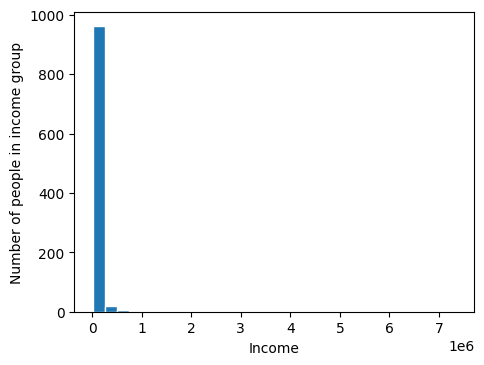

In [9]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes, 30, edgecolor="w")   # 30 bins
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");

We can use more bins and zoom in, but we're still not going to see much:

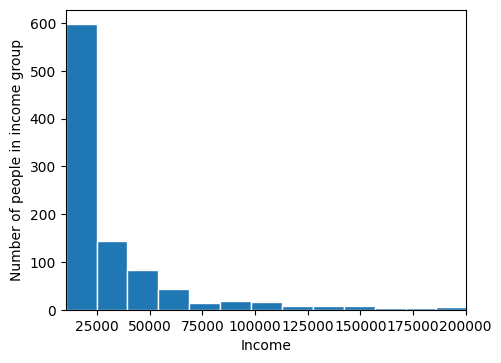

In [10]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes, 500, edgecolor="w")  # 500 bins
axes.set_xlim([10000,200000])
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");

We need a log transformation!

## Log transformation

The function $y= \log(x)$ grows very very slowly. 
We can make $x$ **HUGE** and the log will just **cram** it way down to a small number.

Let's see this:

In [11]:
x = np.linspace(1,1000,400)     # 400 points between 1 and 1000
y = np.log10(x) 

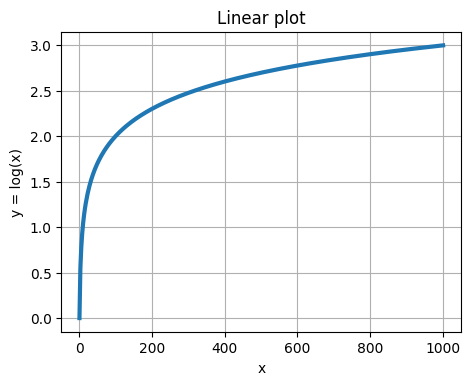

In [12]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.plot(x, y, '-', lw=3)
axes.grid(True,which="both",ls="-")
axes.set_xlabel("x")
axes.set_ylabel("y = log(x)")
axes.set_title("Linear plot");

### Log transforming the plot scale

We now plot **exactly** the same data, just on a semilogx scale:

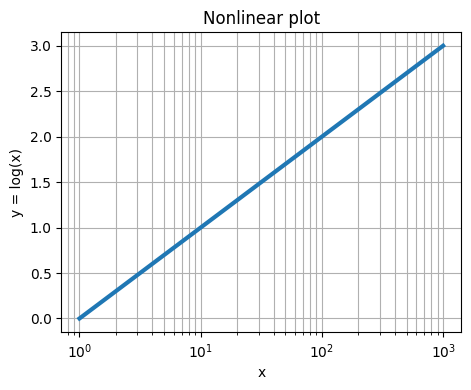

In [9]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

# changing x-axis to log scale
axes.semilogx(x, y, '-', lw=3)      # only x-axis is logarithmic
axes.grid(True,which="both",ls="-")
axes.set_xlabel("x")
axes.set_ylabel("y = log(x)")
axes.set_title("Nonlinear plot");

We can **change space** as we move along the x-axis, squashing larger and larger chunks into a given visual length in such as way that the slow-growing log function now **appears linear!**

### Log transforming the data itself

Instead of squeezing the plot scale, we could just squeeze the data, and use a linear plot scale. The visual outcome is the same:

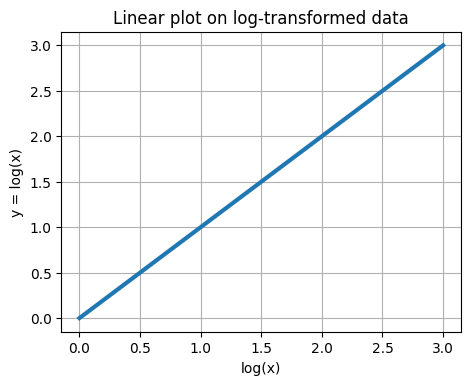

In [13]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

# transforming x data to log(x)
axes.plot(np.log10(x), y, '-', lw=3 )
axes.grid(True,which="both",ls="-")
axes.set_xlabel("log(x)")
axes.set_ylabel("y = log(x)")
axes.set_title("Linear plot on log-transformed data");

The only difference is that `semilogx` is smart enough to nicely label the x-axis with $10^0$ instead of $0$, $10^1$ instead of $1$, $10^2$ instead of $2$, etc., and to allow displaying a logarithmic grid.

### Log transforming the income data

So what? Why is this helpful?

The income data is too broad to see what is happening. The log is a **squashing** function.  

We can log-transform the broad data to squash it down into a range where we can see what's going on!

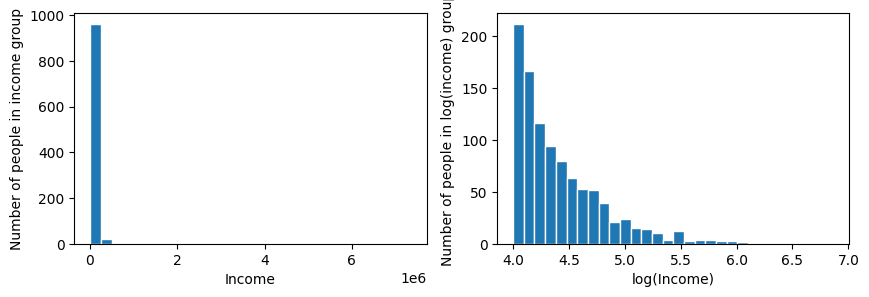

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Left subplot: Original income data
axes = ax[0]
axes.hist(incomes, 30, edgecolor="w")
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group")

# Right subplot: log transformed income data
axes = ax[1]
axes.hist(np.log10(incomes), 30, edgecolor="w")
axes.set_xlabel("log(Income)")
axes.set_ylabel("Number of people in log(income) group");

Nice! We see much more now. And we can even spot the millionaires at 6 ($10^6$).

### Plotting a histogram in log scale

What happens if we bin the original income data and then plot that on a log-axis?

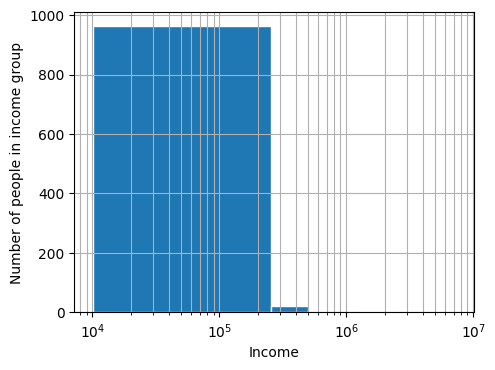

In [16]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes, 30, edgecolor="w")
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");

axes.set_xscale('log')      # log scale on x-axis
axes.grid(True,which="both",ls="-") # Shown for teaching, this does not look very good

**Whoa** That ain't right. 

All we've done is taken the original bins and stretched them logarithmically. That one huge bin still contains the vast majority of the data.

***
To make a nice plot, what we should do is choose **non-uniform** bins. If you choose bins that are spaced wider and wider apart, the log will squash them down until (if chosen well) they are all the same width on the logarithmic scale:

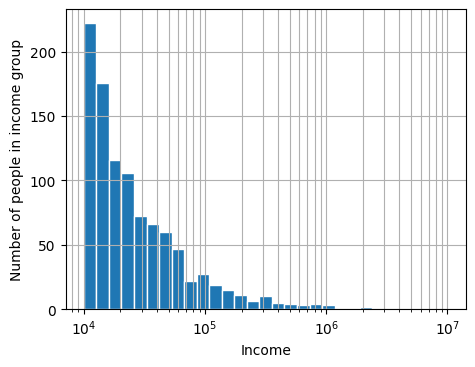

In [18]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes, bins=np.logspace(4, 7, 30), edgecolor="w")   # we need nonlinear bins for log scale
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");
axes.set_xscale('log') 
axes.grid(True,which="both",ls="-") # Shown for teaching

### loglog scale

Sometimes both your x- and your y-values are broadly distribued. We can also log-transform y.

If we plot a function $y=f(x)$ on a plot where both the x- and the y-scales are logarithmic and we see a **straight line** what kind of function is $f$?


Ans: power function.


$$y = a x^b$$

To see this take the log of both sides and replace $\log(y) \to y'$ and $\log(x) \to x'$.

$$
\log(y) = \log(a x^b) = \log(a) + \log(x^b) = a' + b \log(x)
$$

so

$$y' = a' + b x'$$

which is a straight line when we plot $x'$ vs. $y'$. The slope of the straight line is $b$, the exponent of $x$.

*** 

Let's see this in action:

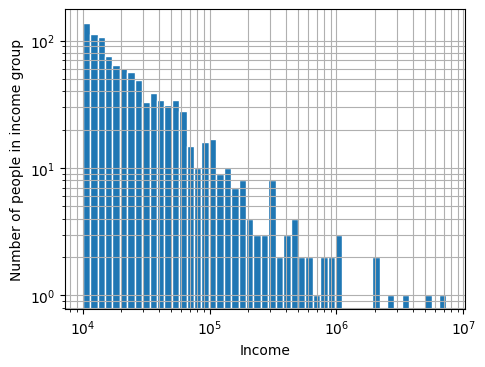

In [20]:
minx = min(incomes)
maxx = max(incomes)
num_bins = 50
logbins = np.logspace(np.log10(minx), np.log10(maxx), num_bins)

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes,  bins=logbins, edgecolor="w")
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");
axes.set_xscale('log')
axes.set_yscale('log') 
axes.grid(True,which="both",ls="-") # Shown for teaching

Nice. 

***

But notice how we don't really need bars, and how they are infinitely tall due to $log(0) \to -\infty$? Therefore it is more customary to draw a plot using lines or points. Also it is nicer to draw a density function using `density=True`:

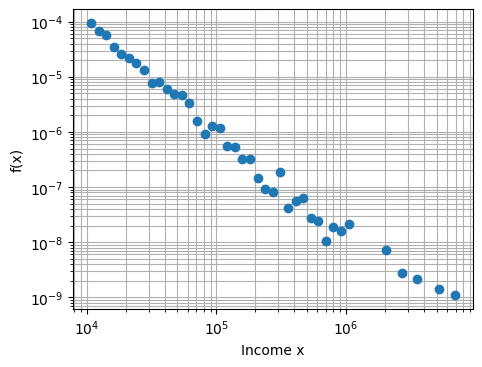

In [21]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

h, binedges = np.histogram(incomes,  bins=logbins, density=True) # We use np.histogram to make the binning calculations. Plotting is done with axes.plot below.
binmidpoints = (binedges[1:] + binedges[:-1]) / 2
axes.plot(binmidpoints, h, "o")
axes.set_xlabel("Income x")
axes.set_ylabel("f(x)");
axes.set_xscale('log') 
axes.set_yscale('log') 
axes.grid(True,which="both",ls="-") # Shown for teaching

In [16]:
binedges

array([  10017.        ,   11460.8291812 ,   13112.76884504,
         15002.81559604,   17165.28968587,   19639.4582146 ,
         22470.24815902,   25709.06217528,   29414.7119896 ,
         33654.48632596,   38505.3727626 ,   44055.45570437,
         50405.51585583,   57670.86023901,   65983.41598606,
         75494.12592678,   86375.68947101,   98825.69855604,
        113070.22560287,  129367.92863279,  148014.7480869 ,
        169349.28063521,  193758.92755514,  221686.92932441,
        253640.41416519,  290199.60668832,  332028.36385219,
        379886.2295522 ,  434642.22673348,  497290.63746934,
        568969.05754697,  650979.05340284,  744809.79650509,
        852165.1043458 ,  974994.37906457, 1115528.00549992,
       1276317.85144089, 1460283.60549913, 1670765.79402393,
       1911586.43976303, 2187118.46373457, 2502365.09053793,
       2863050.69897797, 3275724.7677061 , 3747880.80336603,
       4288092.41079068, 4906168.97606943, 5613333.7894432 ,
       6422427.84245651,

We can see well the power law relation here, but there are also fluctuations. Going next to the complementary cumulative density function solves this issue.

*Back to presentation*

# From probability density function (PDF) to complementary cumulative density function (CCDF)

In [23]:
def plot_pdfcdfccdf(x, setylog=False, setxlog=False, n_bins=100):
    """Plots the PDF, CDF, and CCDF for a given data set x, using hist.""" 

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
    xlim = [np.min(x),np.max(x)]
    if setxlog:
        xlogstring = "log "
    else:
        xlogstring = ""

    # Plot the density curve
    # area under the curve is 1
    ax = axes[0]
    ax.hist(x, n_bins, density=True, cumulative=False, log=setylog)
    ax.set_ylabel('$f(x)$')
    ax.set_xlabel('Data '+ xlogstring +'$x$')
    ax.set_title('PDF')

    # Plot the cumulative density curve
    # each x value is the probability of getting a value less than or equal to x, i.e. P(x<=x), or the area under the curve up to x
    # it can be used to calculate the probability of getting a value between x1 and x2, i.e. P(x1<=x<=x2) = P(x<=x2) - P(x<=x1)
    ax = axes[1]
    ax.hist(x, n_bins, density=True, cumulative=True, log=setylog)
    ax.set_ylabel('$P_{\leq}(x)$')
    ax.set_xlabel('Data '+ xlogstring +'$x$')
    ax.set_title('CDF')

    # Plot the complementary cumulative density curve
    # just a flip of the CDF, i.e. P(x>=x) = 1 - P(x<=x)
    # P(X > x) = 1 - P(X <= x)
    ax = axes[2]
    ax.hist(x, n_bins, density=True, cumulative=-1, log=setylog)
    ax.set_ylabel('$P_{>}(x)$')
    ax.set_xlabel('Data '+ xlogstring +'$x$')
    ax.set_title('CCDF')

    for ax in axes:
        ax.set_xlim(xlim)

### Uniform distribution

#### Theoretical

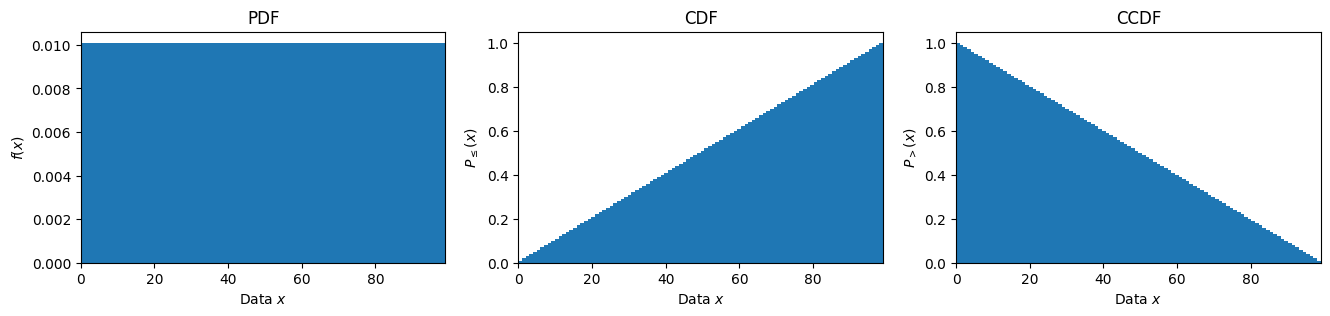

In [24]:
plot_pdfcdfccdf(range(100))

#### Sampled

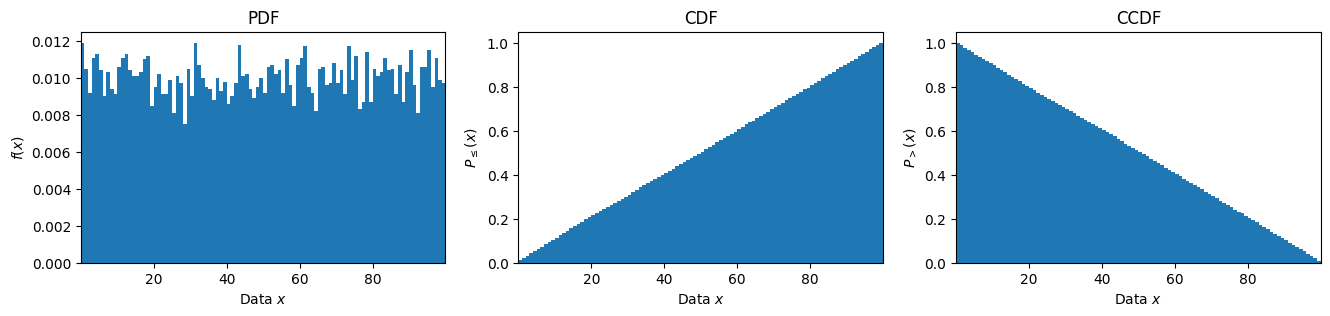

In [26]:
x = np.random.uniform(0, 100, size=10000)       # uniform distribution
plot_pdfcdfccdf(x)
# CDF and CCDF get rid of the fluctuations in the PDF

Nice: the CDF and CCDF get rid of all the fluctuations.

### Normal distribution

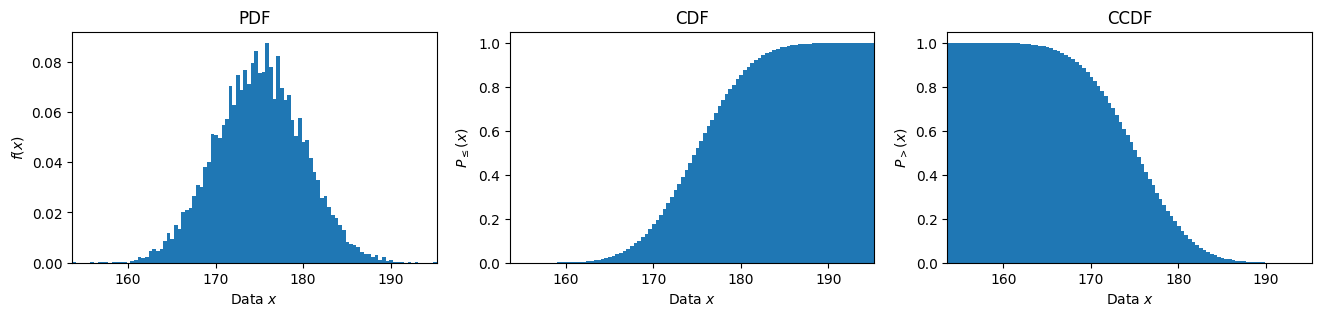

In [27]:
x = np.random.normal(175, 5, size=10000)
plot_pdfcdfccdf(x)

### Exponential distribution

#### Linear scale

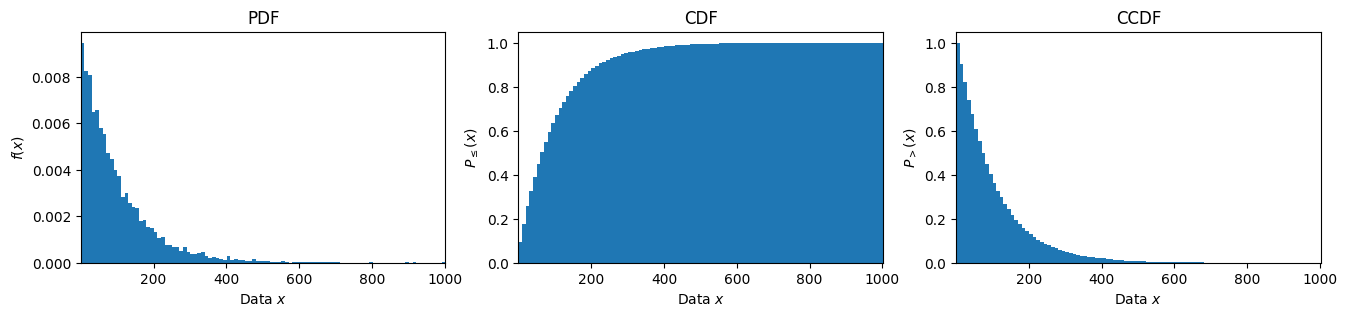

In [28]:
x = np.random.exponential(100, size=10000)
plot_pdfcdfccdf(x)

#### Semilogy scale (better)

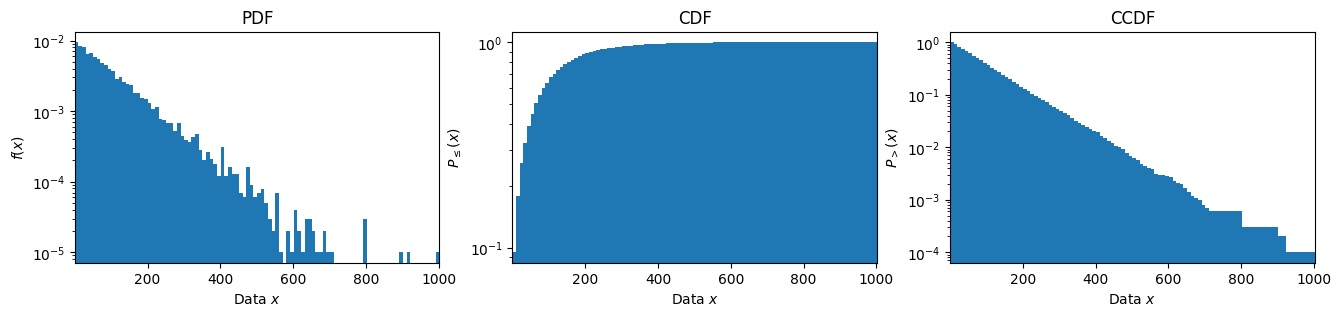

In [29]:
plot_pdfcdfccdf(x, True)

Nice: We can see how the exponential becomes a straight line in the semilogy PDF and CCDF. The CCDF has the added value of being monotonically non-increasing: it is getting rid of fluctuations.

Also note how on a semilogy scale we really need to go from CDF to CCDF so that we can investigate the tail.

### Power law distribution

#### Linear scale (bad)

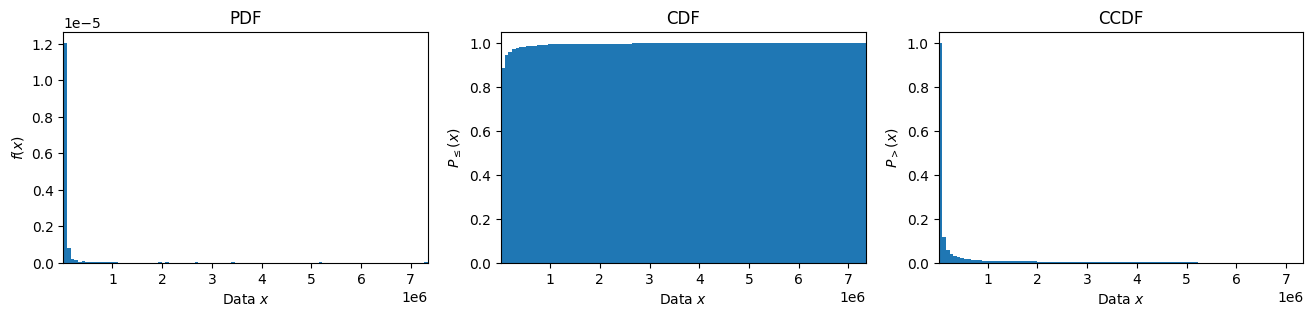

In [30]:
plot_pdfcdfccdf(incomes)

#### Semilogy scale (better)

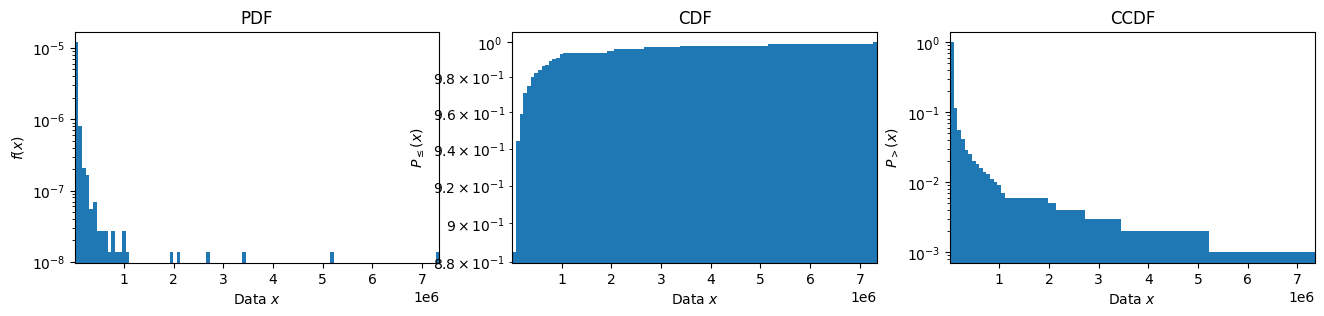

In [31]:
plot_pdfcdfccdf(incomes, True)

#### Loglog (best)

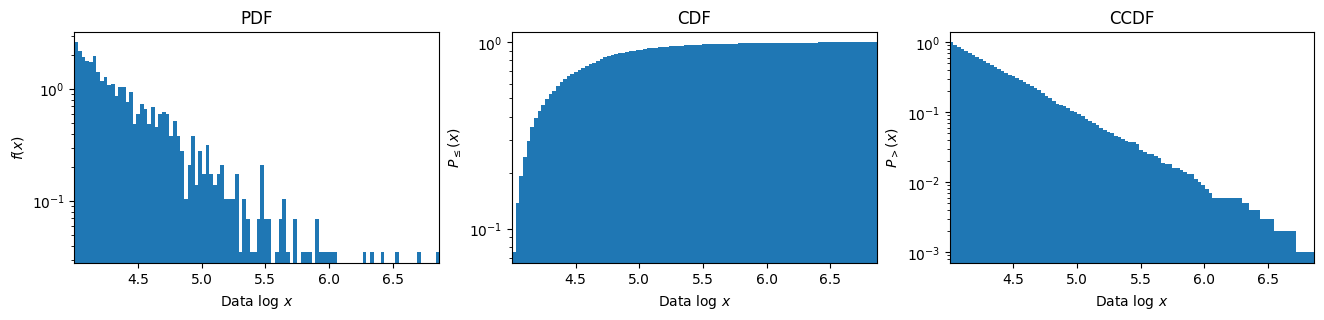

In [35]:
plot_pdfcdfccdf(np.log10(incomes), True, True)

Nice: We can see how the power law becomes a straight line in the loglog PDF and CCDF. The CCDF has the added value of being monotonically non-increasing: it is getting rid of fluctuations.

Also note how on a loglog scale we really need to go from CDF to CCDF so that we can investigate the tail.

***
Look how different this is to the normal distribution in loglog scale:

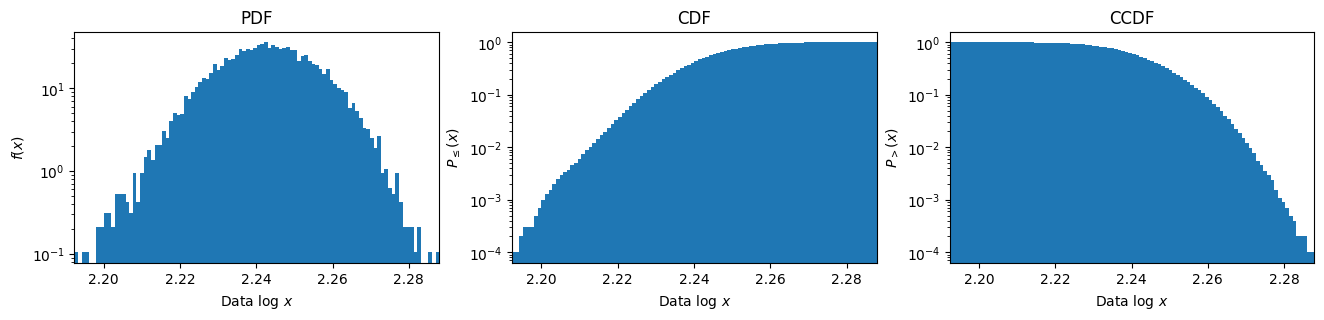

In [36]:
x = np.random.normal(175, 5, size=10000)
plot_pdfcdfccdf(np.log10(x), True, True)

The range of log x values is **miniscule**: 2.19 to 2.29! The tail drops off *extremely* fast.

## Beyond binning

To make the CCDF plot adequate, we should give up binning as it can distort conclusions: You can "lie" by choosing a certain binning. Also, a CCDF is usually drawn using a line and/or point markers. The `hist` method is not really adequate for all this - we could write our own script to create adequate CCDF plots. 

In any case, this notebook should give you the important idea behind the log transformation and the CCDF.

*Back to presentation*